In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.modelling.fault.fault_function import BaseFault
from LoopStructural.visualisation import LavaVuModelViewer, MapView
from LoopStructural.utils import process_map2loop
import pandas as pd
import numpy as np
import os

Cannot import Surfe


## Create a model from map2loop
Map2loop is the preprocessing 

In [2]:
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
                'data_region':.5,
                'solver':'pyamg',
                'length_scale':1,
#                 overprints:overprints,
#                 'cpw':10,
#                 'npw':10
               }

foliation_params = {'nelements':1e4,# how many tetras/voxels
                    'interpolatortype':'PLI',
                    'buffer':.5,  # how much to extend nterpolation around box np.array([1000,1000,1000]),#
                    'solver':'lu',
                    'damp':True,
#                    'gpw':10,
#                    'cpw':.2,
                    
#                     'cgw':0.05
#                     'force_constrained':True
#                    'regularisation':0.5
                   }

model, m2l_data = GeologicalModel.from_map2loop_directory('./data/scratch/',#'/home/lgrose/dev/python/map2loop/Turner_Syncline/',
                                                          skip_faults=False,
                                                          fault_params=fault_params,
#                                                           unconformities=False,
                                                          rescale=True,
                                                          foliation_params=foliation_params)



/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:68: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:69: RuntimeWarning: invalid value encountered in less
  r[v < 0] = self.negative(v[v < 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:48: RuntimeWarning: invalid value encountered in greater
  eva[v > self.max_v] = self.w[0] * self.max_v ** 3 + \
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:51: RuntimeWarning: invalid value encountered in less
  eva[v < self.min_v] = self

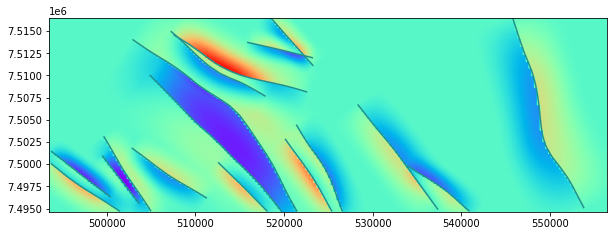

In [3]:
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_fault_displacements()
mapview.add_faults()

# for i in range(5):
#     def mask(x):
#         val = model.features[i].displacementfeature.evaluate_value(x)
#         val[np.isnan(val)] = 0
#         maskv = np.zeros(val.shape).astype(bool)
# #         maskv[~np.isnan(val)][np.abs(val[~np.isnan(val)]) > 0.001] = 1
#         maskv[np.abs(val) > 0.001] = 1
# #         maskv = lambda x : np.abs() > 0.01
#         return maskv
# #     mask = lambda x : np.abs(model.features[i].displacementfeature.evaluate_value(x)) > 0.0001
#     mapview.add_contour(model.features[i],0,mask=mask)


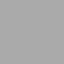

In [4]:
# %%notify
view = LavaVuModelViewer(model,vertical_exaggeration=1)
view.nelements=1e6
view.add_model()
view.nelements=1e5
view.add_model_surfaces()
view.interactive()

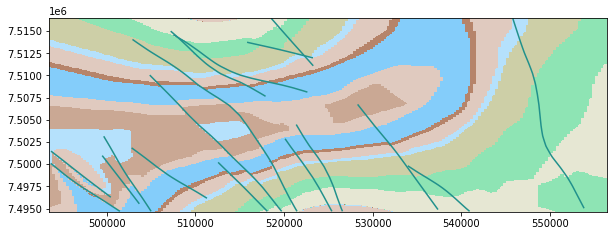

In [5]:
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_faults()
mapview.add_model()
# mapview.add_data(model.get_feature_by_name('supergroup_0'),unfault=True,grad=False)

In [ ]:
faults = model.get_feature_by_name('supergroup_0').builder.faults

In [ ]:
original = model.get_feature_by_name('supergroup_0').builder.get_value_constraints()
restored = model.get_feature_by_name('supergroup_0').interpolator.get_value_constraints()
newp = faults[0].apply_to_points(original[:,:3])

In [ ]:
original[:,:3]-newp

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(original[:,0],original[:,1],c='black')
plt.scatter(restored[:,0],restored[:,1],c='green')#-restored[:,:3]

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:68: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:69: RuntimeWarning: invalid value encountered in less
  r[v < 0] = self.negative(v[v < 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:48: RuntimeWarning: invalid value encountered in greater
  eva[v > self.max_v] = self.w[0] * self.max_v ** 3 + \
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:51: RuntimeWarning: invalid value encountered in less
  eva[v < self.min_v] = self

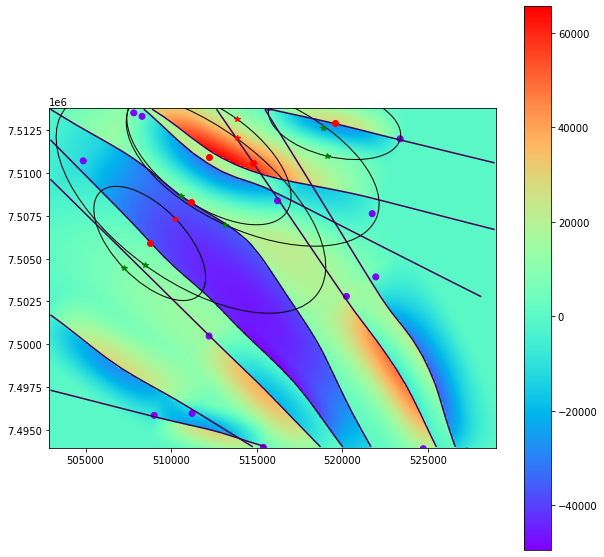

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

mapview = MapView(model)

# mapview.bounding_box
mapview.nsteps = (200,200)
cax = mapview.add_fault_displacements()
plt.colorbar(cax)

# mapview.add_faults()
# mapview.ax.scatter(disp[:,1],disp[:,2],c=disp[:,0])
# mapview.ax.quiver(dthrow[:,2],dthrow[:,3],dthrow[:,0],dthrow[:,1])
for f in model.features:
    if f.type == 'fault':
#         mapview.add_data(f[0],val=True,grad=True,symb_scale=500)
        mapview.add_data(f[2],val=True,grad=False,symb_scale=500)

        mapview.add_contour(f[0],[0])
#         mapview.add_contour(f.displacementfeature,[0.1])
#         mapview.add_scalar_field(f[2])
#         print(f[2].interpolator.get_value_constraints())
#         break
#         mapview.add_contour(f[0],0)
#         mapview.add_scalar_field(f[1])
#         break
fault_locations = pd.read_csv('scratch2/output/faults.csv')
fault_dimensions = pd.read_csv('scratch2/output/fault_dimensions.csv')
fault_orientation = pd.read_csv('scratch2/output/fault_orientations.csv')
fault_centers = np.zeros((len(fault_locations['formation'].unique()),5))
for i, f in enumerate(fault_locations['formation'].unique()):
    fault_centers[i,:3] = np.mean(fault_locations.loc[fault_locations['formation']==f,['X','Y','Z']],axis=0)# auplt.scatter(fault_locations['X'],fault_locations['Y'])
    fault_centers[i,3] = np.mean(fault_orientation.loc[fault_orientation['formation']==f,['DipDirection']])
    fault_centers[i,4] = fault_dimensions.loc[fault_dimensions['Fault']==f,'InfluenceDistance']
fault_edges = np.zeros((fault_centers.shape[0],6))
normal_vector = np.zeros((fault_centers.shape[0],3))
normal_vector[:,0] = np.sin(np.deg2rad(fault_centers[:,3]))
normal_vector[:,1] = np.cos(np.deg2rad(fault_centers[:,3]))

fault_edges[:,:3] = fault_centers[:,:3]+normal_vector*fault_centers[:,4][:,None]
fault_edges[:,3:] = fault_centers[:,:3]-normal_vector*fault_centers[:,4][:,None]

plt.plot(fault_centers[:,0],fault_centers[:,1],'ro')
ax = plt.gca()

for i, f in enumerate(fault_locations['formation'].unique()):
#         plt.scatter(fault_locations.loc[fault_locations['formation']==f,'X'],fault_locations.loc[fault_locations['formation']==f,'Y'],c='black')
        if f in model.feature_name_index.keys():
            e = Ellipse((fault_centers[i,0],fault_centers[i,1]),
                    fault_dimensions.loc[fault_dimensions['Fault']==f,'HorizontalRadius']*2,
                    fault_dimensions.loc[fault_dimensions['Fault']==f,'InfluenceDistance']*2,
                       360-fault_centers[i,3],
                        facecolor='None',edgecolor='k')

            ax.add_patch(e)
        
plt.plot(fault_edges[:,0],fault_edges[:,1],'r*')
plt.plot(fault_edges[:,3],fault_edges[:,4],'g*')
# fault_displacements['X'],fault_displacements['Y'],c=fault_displacements['vertical_displacement'])
# mapview.ax.quiver(fault_displacements['X'],fault_displacements['Y'],fault_displacements['dx'],fault_displacements['dy'])

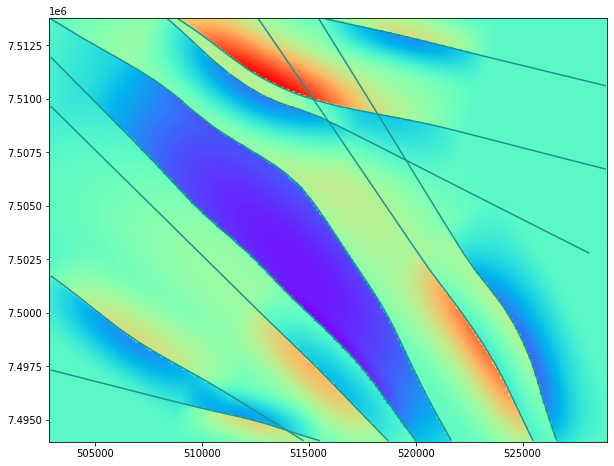

In [18]:
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_faults()
mapview.add_fault_displacements()

In [ ]:
m2l_data['data'][m2l_data['data']['feature_name']==f.name]#f[0].interpolator.get_norm_constraints()

In [ ]:
model.get_feature_by_name('Fault_8973')[0].interpolator.get_value_constraints()

In [ ]:
fault_displacements  = pd.read_csv('scratch2/output/fault_displacements3.csv')
fault_displacements['Z'] = 0
fault_displacements.loc[:,['X','Y','Z']] = model.scale(fault_displacements.loc[:,['X','Y','Z']].to_numpy())
fault_displacements['dx'] = np.sin(np.deg2rad(fault_displacements['downthrow_dir']))
fault_displacements['dy'] = np.cos(np.deg2rad(fault_displacements['downthrow_dir']))


In [ ]:
max_displacement = {}
downthrow = {}
for f in fault_displacements['fname'].unique():
    displacements_numpy = fault_displacements.loc[fault_displacements['fname'] == f, ['vertical_displacement', 'downthrow_dir','dx','dy','X','Y']].to_numpy()
    # index = np.argmax(np.abs(displacements_numpy[:, 0]), )
    index = np.argsort(np.abs(displacements_numpy[:, 0]))[len(np.abs(displacements_numpy[:, 0]))//2]

    max_displacement[f] = displacements_numpy[
        index, [0,4,5]]
    downthrow[f] = displacements_numpy[index,[2,3,4,5]]
#     if displacements_numpy[index, 1] - displacements_numpy[index, 2] > 90:
#         fault_orientations.loc[fault_orientations['formation'] == fname, 'DipDirection'] = -fault_orientations.loc[fault_orientations['formation'] == fname, 'DipDirection']
        #displacements_numpy[
         #   index, 1]
    # .loc[displacements['fname'] == f,'vertical_displacement'].max()

In [3]:
downthrow_dir = np.array(list(m2l_data['downthrow_dir'].values()))
dx = np.sin(np.deg2rad(downthrow_dir[:,0]))
dy = np.cos(np.deg2rad(downthrow_dir[:,0]))#= np.hstack([downthrow_dir[:,1:],np.vstack([[np.sin(np.deg2rad(downthrow_dir[:,0]))],[np.cos(np.deg2rad(downthrow_dir[:,1]))]]).T])


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:68: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:69: RuntimeWarning: invalid value encountered in less
  r[v < 0] = self.negative(v[v < 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:48: RuntimeWarning: invalid value encountered in greater
  eva[v > self.max_v] = self.w[0] * self.max_v ** 3 + \
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:51: RuntimeWarning: invalid value encountered in less
  eva[v < self.min_v] = self

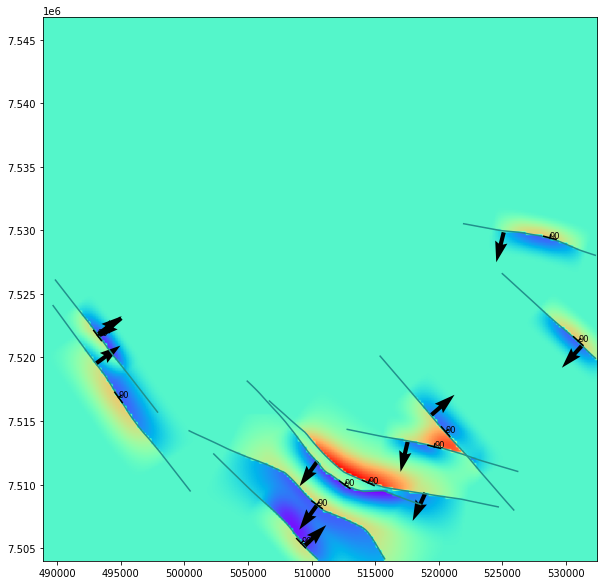

In [4]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
mapview.nsteps = (200,200)
mapview.add_fault_displacements()
mapview.add_faults()
mapview.ax.quiver(downthrow_dir[:,1],downthrow_dir[:,2],dx,dy)
mapview
for f in model.features:
    if f.type == 'fault':
        mapview.add_data(f[0],symb_scale=500,point_colour='black',val=False)
# from matplotlib.patches import Ellipse

# plt.plot(fault_centers[:,0],fault_centers[:,1],'ro')
# ax = plt.gca()
# for i, f in enumerate(fault_locations['formation'].unique()):
# #         plt.scatter(fault_locations.loc[fault_locations['formation']==f,'X'],fault_locations.loc[fault_locations['formation']==f,'Y'],c='black')

#         e = Ellipse((fault_centers[i,0],fault_centers[i,1]),
#                 fault_dimensions.loc[fault_dimensions['Fault']==f,'VerticalRadius'],
#                 fault_dimensions.loc[fault_dimensions['Fault']==f,'InfluenceDistance'],
#                    360-fault_centers[i,3],
#                     facecolor='None',edgecolor='k')

#         ax.add_patch(e)    

In [ ]:
disp = np.array(list(max_displacement.values()))
dthrow = np.array(list(downthrow.values()))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(fault_displacements['X'],fault_displacements['Y'],c=fault_displacements['vertical_displacement'])


In [ ]:
plt.hist(fault_displacements['vertical_displacement'])

In [ ]:
view.image('m2l_test_dome_both_vectors.png')

In [ ]:
gcp = model.get_feature_by_name('supergroup_0').interpolator.get_norm_constraints()
calc = model.get_feature_by_name('supergroup_0').evaluate_gradient(gcp[:,:3])

In [ ]:
view.add_vector_data(gcp[:,:3],gcp[:,3:6],'test')
view.add_vector_data(gcp[:,:3],calc,'test2',colour='red')

view.interactive()

In [ ]:
vdata = model.get_feature_by_name('supergroup_0').interpolator.get_value_constraints()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(vdata[:,0],vdata[:,1],c=vdata[:,3])
plt.colorbar()

In [ ]:
model.stratigraphic_column

In [ ]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
# mapview.nsteps=(200,200)
mapview.add_fault_displacements()
mapview.add_faults()